## Imports

In [ ]:
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os
import pandas as pd
import pickle

from eval import DATA

pd.set_option("display.max_columns", 100)

mbpp = DATA["mbpp"]  # train, validation, and test
humaneval = DATA["openai_humaneval"]  # test only

## Helpers

In [2]:
RESULTS_PATH = "./results/"

def save_pickle(object, to):
    with open(to, "wb") as f:
        pickle.dump(object, f)
    
def load_pickle(from_):
    with open(from_, "rb") as f:
        return pickle.load(f)


## Load and Combine Results

In [3]:
df = pd.concat([
    pd.read_csv(RESULTS_PATH + file_name)
    for file_name in os.listdir(RESULTS_PATH)
    if file_name.endswith(".csv")
]).drop(columns="Unnamed: 0")

print(df.value_counts(["dataset", "split", "model"]))  # Counts
df

dataset           split       model                                     
mbpp              test        canonical_solution                            500
                              claude_3_haiku_0_shot                         500
                  train       canonical_solution                            374
                              claude_3_haiku_0_shot_v4_prompt               374
openai_humaneval  test        llama3_0_shot                                 164
                              llama3_0_shot_finetuned_smaller_LR_4_epoch    164
                              llama3_0_shot_finetuned_smaller_LR_3_epoch    164
                              llama3_0_shot_finetuned_smaller_LR_2_epoch    164
                              llama3_0_shot_finetuned_smaller_LR_1_epoch    164
                              llama3_0_shot_finetuned_5_epoch               164
                              llama3_0_shot_finetuned_4_epoch               164
                              llama3_0_shot_fin

,dataset,split,task_id,model,code,result,avg_test_time,passed_tests,compiled,loc,lloc,sloc,comments,multi,blank,single_comments,CC,h1,h2,N1,N2,vocabulary,length,calculated_length,volume,difficulty,effort,time,bugs,MI,example
0,mbpp,test,0.0,canonical_solution,# Write a python function to remove first and ...,passed,0.000058,True,True,11.0,12.0,10.0,1.0,0.0,0.0,1.0,5.0,4.0,10.0,9.0,16.0,14.0,25.0,41.219281,95.183873,3.20,304.588394,16.921577,0.031728,79.749780,NaN
1,mbpp,test,1.0,canonical_solution,# Write a function to sort a given matrix in a...,passed,0.000129,True,True,4.0,3.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,100.000000,NaN
2,mbpp,test,2.0,canonical_solution,# Write a function to count the most common wo...,passed,0.000197,True,True,6.0,5.0,5.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,100.000000,NaN
3,mbpp,test,3.0,canonical_solution,# Write a python function to find the volume o...,passed,0.000033,True,True,3.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,2.0,6.0,3.0,6.0,8.0,9.0,17.509775,27.000000,1.00,27.000000,1.500000,0.009000,100.000000,NaN
4,mbpp,test,4.0,canonical_solution,# Write a function to split a string at lowerc...,passed,0.000057,True,True,4.0,3.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,100.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,openai_humaneval,test,159.0,llama3_0_shot_finetuned_smaller_LR_2_epoch,"def eat(number, need, remaining):\n """"""\n ...",passed,0.000115,True,True,36.0,9.0,8.0,0.0,24.0,4.0,0.0,2.0,3.0,3.0,4.0,8.0,6.0,12.0,9.509775,31.019550,4.00,124.078200,6.893233,0.010340,55.822181,NaN
160,openai_humaneval,test,160.0,llama3_0_shot_finetuned_smaller_LR_2_epoch,"def do_algebra(operator, operand):\n """"""\n ...",passed,0.000126,True,True,29.0,6.0,5.0,0.0,20.0,4.0,0.0,2.0,1.0,8.0,6.0,12.0,9.0,18.0,24.000000,57.058650,0.75,42.793988,2.377444,0.019020,45.813793,NaN
161,openai_humaneval,test,161.0,llama3_0_shot_finetuned_smaller_LR_2_epoch,"def solve(s):\n """"""You are given a string s...",failed:,NaN,False,True,18.0,10.0,8.0,0.0,10.0,0.0,0.0,5.0,1.0,1.0,1.0,1.0,2.0,2.0,0.000000,2.000000,0.50,1.000000,0.055556,0.000667,96.882486,NaN
162,openai_humaneval,test,162.0,llama3_0_shot_finetuned_smaller_LR_2_epoch,"def string_to_md5(text):\n """"""\n Given a...",passed,0.000056,True,True,11.0,6.0,5.0,0.0,5.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,0.000000,2.000000,0.50,1.000000,0.055556,0.000667,100.000000,NaN


## Analysis

### Correctness Metrics

#### Overall

In [4]:
GROUPING = ["dataset", "split", "model"]
df.groupby(GROUPING)[["compiled", "passed_tests"]].mean()

compiled  \
dataset          split      model                                                  
mbpp             test       canonical_solution                               1.0   
                            claude_3_haiku_0_shot                            1.0   
                 train      canonical_solution                               1.0   
                            claude_3_haiku_0_shot_v4_prompt                  1.0   
                 validation canonical_solution                               1.0   
                            claude_3_haiku_0_shot                            1.0   
                            claude_3_haiku_0_shot_v2_prompt                  1.0   
                            claude_3_haiku_0_shot_v3_prompt                  1.0   
                            claude_3_haiku_0_shot_v4_prompt                  1.0   
                            claude_3_haiku_0_shot_v5_prompt                  1.0   
                            claude_3_haiku_0_shot_v6_prompt                  1.0   
                            claude_3_haiku_0_shot_v7_prompt                  1.0   
                            claude_3_haiku_0_shot_v8_prompt                  1.0   
openai_humaneval test       canonical_solution                               1.0   
                            claude_3_haiku_0_shot                            1.0   
                            llama3_0_shot                               0.993902   
                            llama3_0_shot_finetuned_1_epoch             0.993902   
                            llama3_0_shot_finetuned_2_epoch             0.981707   
                            llama3_0_shot_finetuned_3_epoch             0.908537   
                            llama3_0_shot_finetuned_4_epoch             0.835366   
                            llama3_0_shot_finetuned_5_epoch             0.859756   
                            llama3_0_shot_finetuned_smaller_LR_1_epoch  0.993902   
                            llama3_0_shot_finetuned_smaller_LR_2_epoch  0.993902   
                            llama3_0_shot_finetuned_smaller_LR_3_epoch  0.987805   
                            llama3_0_shot_finetuned_smaller_LR_4_epoch  0.993902   
                            llama3_0_shot_finetuned_smaller_LR_5_epoch  0.987805   

                                                                       passed_tests  
dataset          split      model                                                    
mbpp             test       canonical_solution                                  1.0  
                            claude_3_haiku_0_shot                             0.212  
                 train      canonical_solution                                  1.0  
                            claude_3_haiku_0_shot_v4_prompt                0.751337  
                 validation canonical_solution                                  1.0  
                            claude_3_haiku_0_shot                          0.188889  
                            claude_3_haiku_0_shot_v2_prompt                0.277778  
                            claude_3_haiku_0_shot_v3_prompt                0.711111  
                            claude_3_haiku_0_shot_v4_prompt                0.755556  
                            claude_3_haiku_0_shot_v5_prompt                0.711111  
                            claude_3_haiku_0_shot_v6_prompt                0.744444  
                            claude_3_haiku_0_shot_v7_prompt                0.744444  
                            claude_3_haiku_0_shot_v8_prompt                0.744444  
openai_humaneval test       canonical_solution                                  1.0  
                            claude_3_haiku_0_shot                          0.646341  
                            llama3_0_shot                                  0.670732  
                            llama3_0_shot_finetuned_1_epoch                 0.47561  
                            llama3_0_shot_finetuned_2_epoch                0.341463  

#### Finetuning Correctness

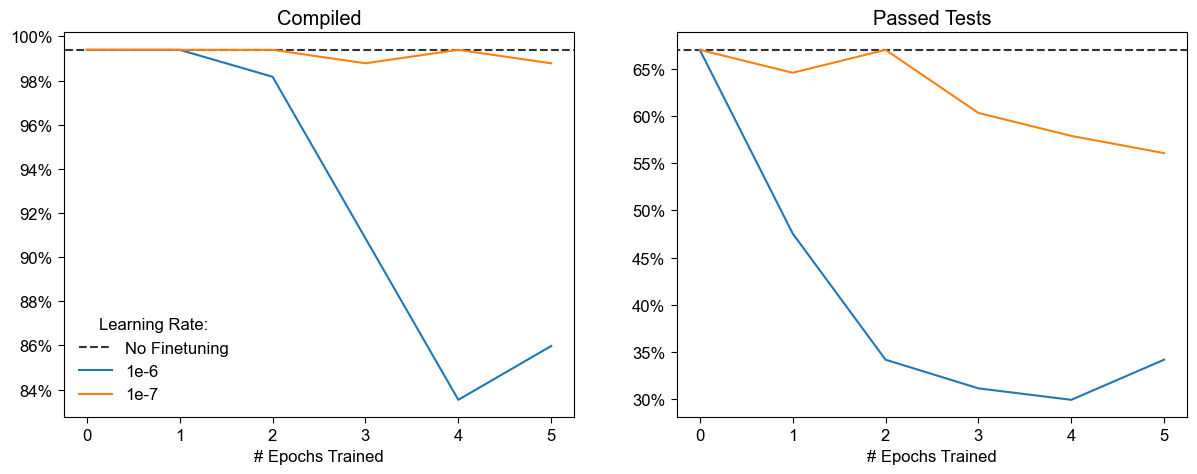

In [103]:
correctness_metrics = ["compiled", "passed_tests"]
correctness_metrics_df = df.groupby(GROUPING)[correctness_metrics].mean().reset_index()

def _plot_llama3_correctness(ax, correctness_metrics_df, metric, show_legend=True):
    correctness_metrics = ["compiled", "passed_tests"]
    metric_names = {
        "compiled": "Compiled",
        "passed_tests": "Passed Tests"
    }
    assert metric in correctness_metrics

    baseline_llama3 = "llama3_0_shot"

    llama3_correctness_metrics =\
        correctness_metrics_df[correctness_metrics_df["model"].apply(
            lambda model: model.startswith("llama3")
        )]
    llama3_baseline_correctness_metrics =\
        llama3_correctness_metrics.query(f"model == '{baseline_llama3}'")[correctness_metrics]

    llama3_correctness_for_plotting =\
        llama3_correctness_metrics[llama3_correctness_metrics["model"] != f"{baseline_llama3}"].copy()
    llama3_correctness_for_plotting["epochs_trained"] = llama3_correctness_for_plotting["model"].apply(
        lambda model: model[-7]
    )
    llama3_correctness_for_plotting["learning_rate"] = llama3_correctness_for_plotting["model"].apply(
        lambda model: "1e-7" if "smaller_LR" in model else "1e-6"
    )

    larger_LR = llama3_correctness_for_plotting.query("learning_rate == '1e-6'")
    smaller_LR = llama3_correctness_for_plotting.query("learning_rate == '1e-7'")

    # fig, ax = plt.subplots()
    # Reference Line:
    ax.hlines(
        llama3_baseline_correctness_metrics[metric].tolist(),
        xmin=-1e8, xmax=1e8,
        label="No Finetuning",
        color="#333",
        linestyle="dashed"
    )
    # Main Lines:
    ax.plot(
        [0] + larger_LR["epochs_trained"].tolist(),
        llama3_baseline_correctness_metrics[metric].tolist() + larger_LR[metric].tolist(),
        label="1e-6"
    )
    ax.plot(
        [0] + smaller_LR["epochs_trained"].tolist(),
        llama3_baseline_correctness_metrics[metric].tolist() + smaller_LR[metric].tolist(),
        label="1e-7"
    )
    ax.set_title(metric_names[metric])
    ax.set_xlabel("# Epochs Trained")
    # plt.ylabel("%")
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
    if show_legend:
        ax.legend(
            title="Learning Rate:",
            frameon=False,
            shadow=False
        )
    return ax


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14.5, 5))
ax1 = _plot_llama3_correctness(ax1, correctness_metrics_df, metric="compiled")
ax2 = _plot_llama3_correctness(ax2, correctness_metrics_df, metric="passed_tests", show_legend=False)
plt.show()

### Efficiency & Simplicity Metrics

In [5]:
friendly_metric_names = {
    "loc": "# total lines of code",
    "lloc": "# logical lines of code",
    "sloc": "# source lines of code",
    "comments": "# single-line (#) comment lines",
    "multi": "# multi-line strings lines",
    "blank": "# white-space only lines",
    "single_comments": "# single-line (#) comment-only lines",
    "CC": "Cylomatic Complexity",
    "h1": "# distinct operators",
    "h2": "# distinct operands",
    "N1": "# total operators",
    "N2": "# total operands",
    "vocabulary": "Vocabulary size (distinct operators + operands)",
    "length": "Program length (total operators + operands)",
    "calculated_length": "Halstead estimated program length",
    "volume": "Halstead volume",
    "difficulty": "Halstead difficulty",
    "effort": "Halstead effort",
    "time": "Halstead time required to program",
    "bugs": "Halstead estimated bugs",
    "MI": "Maintainability Index"
}

In [10]:
test_results_df = df.query("split == 'test'")
mbpp_test_results_df = test_results_df.query("dataset == 'mbpp'")
humaneval_test_results_df = test_results_df.query("dataset == 'openai_humaneval'")

In [14]:
model = "claude_3_haiku_0_shot"  # Enter model to analyze

# Find tasks model got correct:
humaneval_test_correct_tasks = set(
    humaneval_test_results_df
    .query(f"model == '{model}' and passed_tests")
    ["task_id"]
)
mbpp_test_correct_tasks = set(
    mbpp_test_results_df
    .query(f"model == '{model}' and passed_tests")
    ["task_id"]
)

# Filter to only tasks model got correct:
model_correct_humaneval_df = (
    humaneval_test_results_df
    [humaneval_test_results_df["task_id"].apply(
        lambda id: id in humaneval_test_correct_tasks
    )]
)
model_correct_mbpp_df = (
    mbpp_test_results_df
    [mbpp_test_results_df["task_id"].apply(
        lambda id: id in mbpp_test_correct_tasks
    )]
)


#### Means

In [15]:
simplicity_metrics = df.columns[9:]
successful_solution_metrics = ["avg_test_time"] + list(simplicity_metrics)

humaneval_means = (
    model_correct_humaneval_df
    .groupby("model")
    # Select relevant columns to analyze
    [successful_solution_metrics]
    .mean()
    .T
)
mbpp_means = (
    model_correct_mbpp_df
    .groupby("model")
    # Select relevant columns to analyze
    [successful_solution_metrics]
    .mean()
    .T
)

print("HumanEval:")
print(humaneval_means)
print("")
print("MBPP:")
mbpp_means

HumanEval:
model              canonical_solution  claude_3_haiku_0_shot  llama3_0_shot
avg_test_time                0.000630               0.000507       0.000630
loc                         20.886792              16.339623      18.839623
lloc                         8.839623               7.830189       7.971698
sloc                         7.735849               6.933962       6.981132
comments                     0.018868               0.056604       0.000000
multi                       10.188679               7.047170      10.349057
blank                        2.943396               2.254717       1.509434
single_comments              0.018868               0.103774       0.000000
CC                           3.575472               3.462264       3.622642
h1                           2.679245               2.915094       2.858491
h2                           5.981132               5.509434       5.679245
N1                           4.122642               3.839623       4.075472
N

model,canonical_solution,claude_3_haiku_0_shot
avg_test_time,0.049483,0.044969
loc,9.754717,12.235849
lloc,8.783019,7.792453
sloc,8.698113,7.283019
comments,1.000000,0.084906
multi,0.000000,2.990566
blank,0.056604,1.867925
single_comments,1.000000,0.094340
CC,3.339623,2.962264
h1,2.660377,2.490566


#### Percent Change

(Final metric shown in paper)

In [31]:
humaneval_percent_deltas = (
    (humaneval_means[model] - humaneval_means["canonical_solution"])
    /humaneval_means["canonical_solution"]
)
mbpp_percent_deltas = (
    (mbpp_means[model] - mbpp_means["canonical_solution"])
    /mbpp_means["canonical_solution"]
)

print("HumanEval:")
print(round(humaneval_percent_deltas, 3) * 100)
print("")
print("MBPP:")
print(round(mbpp_percent_deltas, 3) * 100)

HumanEval:
avg_test_time        -19.5
loc                  -21.8
lloc                 -11.4
sloc                 -10.4
comments             200.0
multi                -30.8
blank                -23.4
single_comments      450.0
CC                    -3.2
h1                     8.8
h2                    -7.9
N1                    -6.9
N2                    -9.5
vocabulary            -2.7
length                -8.6
calculated_length     -5.1
volume                -9.8
difficulty             6.1
effort                -4.5
time                  -4.5
bugs                  -9.8
MI                     0.4
dtype: float64

MBPP:
avg_test_time          -9.1
loc                    25.4
lloc                  -11.3
sloc                  -16.3
comments              -91.5
multi                   inf
blank                3200.0
single_comments       -90.6
CC                    -11.3
h1                     -6.4
h2                     -7.1
N1                    -10.2
N2                    -10.0
vocabular

## MBPP Train

In [16]:
mbpp_train_results = df.query("dataset == 'mbpp' and split =='train'")
mbpp_train_correct_tasks = set(
    mbpp_train_results
    .query(f"model == 'claude_3_haiku_0_shot_v4_prompt' and passed_tests")
    ["task_id"]
)

# Filter to only tasks model got correct:
model_correct_mbpp_df = (
    mbpp_train_results
    [mbpp_train_results["task_id"].apply(
        lambda id: id in mbpp_train_correct_tasks
    )]
)

In [21]:
mbpp_means = (
    model_correct_mbpp_df
    .groupby("model")
    # Select relevant columns to analyze
    [successful_solution_metrics]
    .mean()
    .T
)
mbpp_means

model,canonical_solution,claude_3_haiku_0_shot_v4_prompt
avg_test_time,0.000084,0.000137
loc,7.480427,9.220641
lloc,6.540925,5.914591
sloc,6.466192,5.530249
comments,1.003559,0.056940
multi,0.000000,2.274021
blank,0.014235,1.359431
single_comments,1.000000,0.056940
CC,2.672598,2.565836
h1,2.067616,2.056940


In [24]:
(
    (mbpp_means["claude_3_haiku_0_shot_v4_prompt"] - mbpp_means["canonical_solution"])
    / mbpp_means["canonical_solution"]
)

avg_test_time         0.636030
loc                   0.232636
lloc                 -0.095756
sloc                 -0.144744
comments             -0.943262
multi                      inf
blank                94.500000
single_comments      -0.943060
CC                   -0.039947
h1                   -0.005164
h2                   -0.053394
N1                   -0.076297
N2                   -0.084375
vocabulary           -0.038584
length               -0.081640
calculated_length    -0.069805
volume               -0.098353
difficulty           -0.043413
effort               -0.123037
time                 -0.123037
bugs                 -0.098353
MI                   -0.139690
dtype: float64